<div class="alert alert-warning">
    <h2> 💡Oпрос населения по темам, посвященным формированию гражданского общества в России. <a class="tocSkip"> </h2>
    
</div>

## Загрузка данных

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
# библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder
)


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score



from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from optuna.integration import OptunaSearchCV
import optuna


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

In [3]:
pip install notebook-as-pdf -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
# загрузка данных
data = pd.read_excel('/Users/vladimirkalinovskii/Desktop/trash/курсовая 1/883_ИМД-2.xlsx', index_col=0)

In [5]:
data.head()

,REGION,FO,Q1010,S1,S2,S3,S3_AGE,S4,Q1,Q2,...,D6,D6_DR,D7,D7_DR,D8,D8_DR,D9,D10,D10_DR,D11
ID,,,,,,,,,,,,,,,,,,,,,
Идентификатор респондента,Region. Отметьте Ваш регион,FO. Федеральный округ,Место опроса,"S1. Тип населённого пункта, где живёт респондент",S2. Пол респондента,"S3. Скажите, пожалуйста, сколько лет Вам испол...",(Запишите) (лет),S4. Какое у Вас образование?,"Q1. Как Вы считаете, большинству людей можно д...","Q2. А если говорить о людях, которые окружают ...",...,"D6. В какой отрасли Вы работаете, какова сфера...",Другое (уточните),D7. Членом или сторонником какой политической ...,Другое (уточнить),D8. Считаете ли Вы себя верующим человеком? И ...,Другое (уточнить ),D9. Какое место занимает религия в Вашей жизни?,D10. В чём выражается Ваша принадлежность к ве...,Другое (уточнить ),D11. Как Вы оцениваете состояние своего здоровья?
063a20a33e679b4,Приморский край,Дальневосточный федеральный округ,Надеждинский муниципальный район,Село,Мужчина,60+ лет,70,"Среднее специальное (колледж, техникум, медици...",Большинству людей можно доверять,Большинству можно доверять,...,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Верующим человеком себя не считаю,NaN,NaN,NaN,NaN,Среднее
06539b004760a54,Саратовская область,Приволжский федеральный округ,Энгельсский муниципальный район,Село,Мужчина,60+ лет,71,Среднее общее (школа),Большинству людей можно доверять,Большинству можно доверять,...,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Верующим человеком себя не считаю,NaN,NaN,NaN,NaN,Плохое
06e85272a3a11d4,Республика Дагестан,Северо-Кавказский федеральный округ,г. Буйнакск,Город с населением от 50 до 100 тыс.,Женщина,35-44 года,44,"Высшее (диплом специалиста, бакалавра, магистра)",В отношениях с людьми следует быть осторожными,В отношениях с людьми моего окружения следует ...,...,"Сфера услуг, сервиса, бытового обслуживания",NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Мусульманин,NaN,Очень важное,"Стараюсь выполнять религиозные предписания, ре...",NaN,Среднее
06470c0967c0d24,Пермский край,Приволжский федеральный округ,г. Березники,Город с населением от 100 до 500 тыс.,Мужчина,35-44 года,43,"Среднее специальное (колледж, техникум, медици...",В отношениях с людьми следует быть осторожными,В отношениях с людьми моего окружения следует ...,...,Промышленное производство (в т.ч. добывающие о...,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Православный,NaN,Затрудняюсь ответить,/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить,NaN,Хорошее


In [6]:
# проверим кол-во строк и столбцов
data.shape

(2003, 500)

<div class="alert alert-warning">
    <h2> 1️⃣ Рассмотрим первые 8 столбцов <a class="tocSkip"> </h2>
    
</div>

## Предобработка данных 

**т.к. датасет крайне объёмный в плане столбцов (500 штук) для начала возьмём первые 8, чтобы посмотреть на данные и осознать как дальше с ними работать**

In [7]:
df_education = data.iloc[1:, :9]

In [8]:
# конвертируем Идентификатор респондента из индекса в столбец
df_education.reset_index(inplace= True , level = ['ID'])

In [9]:
df_education.head(3)

,ID,REGION,FO,Q1010,S1,S2,S3,S3_AGE,S4,Q1
0,063a20a33e679b4,Приморский край,Дальневосточный федеральный округ,Надеждинский муниципальный район,Село,Мужчина,60+ лет,70,"Среднее специальное (колледж, техникум, медици...",Большинству людей можно доверять
1,06539b004760a54,Саратовская область,Приволжский федеральный округ,Энгельсский муниципальный район,Село,Мужчина,60+ лет,71,Среднее общее (школа),Большинству людей можно доверять
2,06e85272a3a11d4,Республика Дагестан,Северо-Кавказский федеральный округ,г. Буйнакск,Город с населением от 50 до 100 тыс.,Женщина,35-44 года,44,"Высшее (диплом специалиста, бакалавра, магистра)",В отношениях с людьми следует быть осторожными


In [10]:
# проверим данные на наличие пропусков
df_education.isna().sum()

ID        0
REGION    0
FO        0
Q1010     0
S1        0
S2        0
S3        0
S3_AGE    0
S4        0
Q1        0
dtype: int64

In [11]:
# проверим наличие дубликатов
df_education.duplicated().sum()

0

## Исследовательский анализ данных

In [12]:
# посмотрим из какого региона поучавствовало больше всего людей
df_education['REGION'].value_counts()

REGION
Город Москва                         170
Город Санкт-Петербург                 73
Республика Дагестан                   69
Ставропольский край                   65
Ростовская область                    49
Приморский край                       45
Республика Крым                       44
Омская область                        44
Республика Коми                       44
Удмуртская Республика                 43
Кировская область                     43
Краснодарский край                    43
Ульяновская область                   42
Саратовская область                   42
Алтайский край                        42
Астраханская область                  42
Иркутская область                     42
Республика Татарстан                  41
Новосибирская область                 40
Ленинградская область                 40
Самарская область                     40
Республика Башкортостан               40
Красноярский край                     39
Чувашская Республика                  39
Тверская 

In [13]:
# выделим топ-5 городов
lst = ['Город Москва', 'Город Санкт-Петербург', 'Республика Дагестан', 'Ставропольский край', 'Ростовская область']

In [14]:
# проверим медианный возраст в топ-5 городах по кол-ву опрошенных по разделению на женщин и мужчин
pivot_age = df_education.query('REGION in @lst').pivot_table(index="REGION", values="S3_AGE", columns=['S2'], aggfunc = 'median')
pivot_age

S2,Женщина,Мужчина
REGION,,
Город Москва,46.0,42.5
Город Санкт-Петербург,45.5,41.0
Республика Дагестан,46.0,38.5
Ростовская область,48.0,42.0
Ставропольский край,50.0,47.0


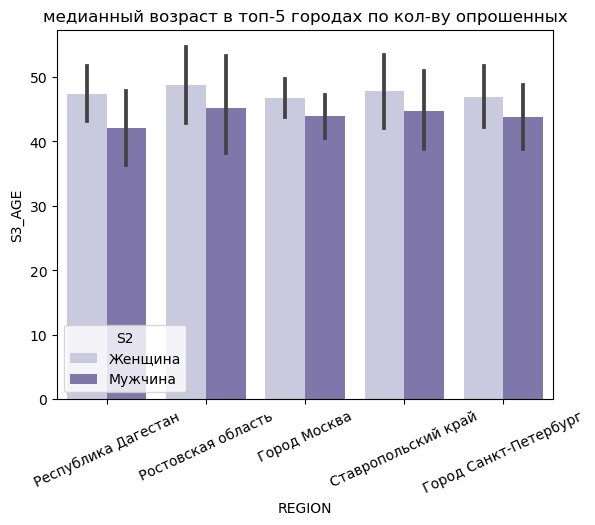

In [15]:
ax = sns.barplot(x='REGION', y='S3_AGE', data=df_education.query('REGION in @lst'), \
            hue='S2', palette='Purples')
ax.set_title('медианный возраст в топ-5 городах по кол-ву опрошенных', fontsize = 12)
plt.xticks(rotation = 25)
plt.show()

In [16]:
# посмотрим на распределение образования среди респондентов
df_education['S4'].value_counts()

S4
Среднее специальное (колледж, техникум, медицинское училище и т.п.)    768
Высшее (диплом специалиста, бакалавра, магистра)                       553
Среднее общее (школа)                                                  350
Неполное среднее или ниже                                              207
Незаконченное высшее (обучение в вузе без получения диплома)            70
Начальное профессиональное (ПТУ, профессиональный лицей и т.п.)         52
Аспирантура, учёная степень, звание                                      2
Name: count, dtype: int64

In [17]:
data['S4'] = data['S4'].replace('Среднее специальное (колледж, техникум, медицинское училище и т.п.) ', 'Среднее специальное ')

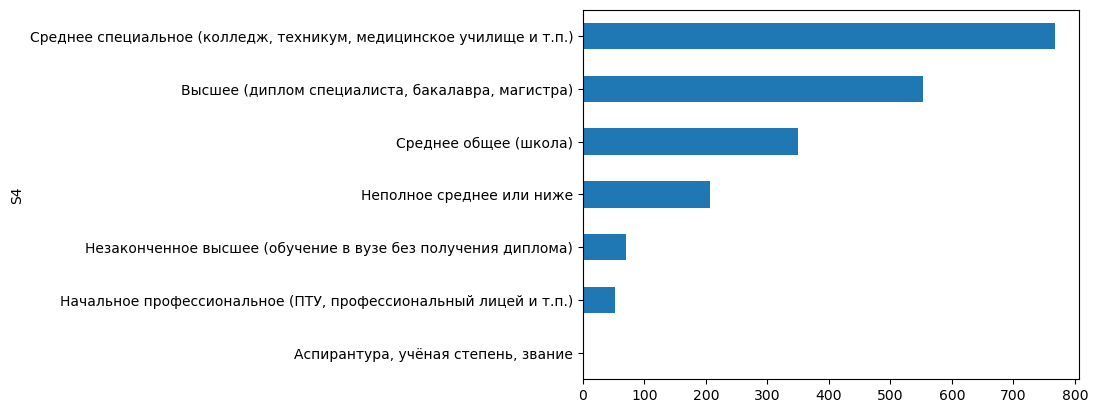

In [18]:
ax = df_education['S4'].value_counts().sort_values().plot(kind='barh')

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> 1️⃣Вывод исследовательского анализа: <a class="tocSkip"> </h2> 
    
    
- Топ-5 городов по количеству опрошенных: Город Москва, Город Санкт-Петербург, Республика Дагестан, Ставропольский край, Ростовская область
- Самый возрастные респонденты из Ставропольского края, медианный возраст среди женщин - 50 и мужчин - 47
- В опросе учавствовало больше женщин чем мужчин и они были как правило старше
- У 38.4% среднее специальное образрвание и всего 2 окончили аспирантуру

<div class="alert alert-warning">
    <h2>  2️⃣Рассмотрим срез по столбцам [Q1 : Q6]<a class="tocSkip"> </h2>
    
</div>

## Предобработка данных

In [19]:
df_cluster_1 = data.iloc[1:, 8:14]
df_cluster_1.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6
ID,,,,,,
063a20a33e679b4,Большинству людей можно доверять,Большинству можно доверять,"Безусловно, согласия, сплоченности","Безусловно, согласия, сплоченности",Скорее к первым (к готовым объединяться),"Да, приходилось"
06539b004760a54,Большинству людей можно доверять,Большинству можно доверять,/НЕ НА КАРТОЧКЕ/ Затрудняюсь ответить,"Скорее согласия, сплоченности","Безусловно, к первым (к готовым объединяться)","Нет, не приходилось"
06e85272a3a11d4,В отношениях с людьми следует быть осторожными,В отношениях с людьми моего окружения следует ...,"Скорее несогласия, разобщенности","Безусловно, несогласия, разобщенности","Безусловно, к первым (к готовым объединяться)","Да, приходилось"


In [20]:
# заменим значения '/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить', '/НЕ НА КАРТОЧКЕ/ Затрудняюсь ответить' на -->
# 'Затрудняюсь ответить'
df_cluster_1 = df_cluster_1.replace(['/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить', '/НЕ НА КАРТОЧКЕ/ Затрудняюсь ответить'],\
                                    'Затрудняюсь ответить')

In [21]:
# создадим функцию для проверки неявных дубликатов
def uniq(data):
    x = data.select_dtypes(include='object').columns.tolist()
    for i in x:
        print(i)
        print(data[i].unique())
        print(data[i].nunique())
        print()


In [22]:
# исследуем данные на неочевидные дубликаты
uniq(df_cluster_1)

Q1
['Большинству людей можно доверять'
 'В отношениях с людьми следует быть осторожными' 'Затрудняюсь ответить']
3

Q2
['Большинству можно доверять'
 'В отношениях с людьми моего окружения следует быть осторожными'
 'Затрудняюсь ответить']
3

Q3
['Безусловно, согласия, сплоченности' 'Затрудняюсь ответить'
 'Скорее несогласия, разобщенности'
 'Безусловно, несогласия, разобщенности' 'Скорее согласия, сплоченности']
5

Q4
['Безусловно, согласия, сплоченности' 'Скорее согласия, сплоченности'
 'Безусловно, несогласия, разобщенности'
 'Скорее несогласия, разобщенности' 'Затрудняюсь ответить']
5

Q5
['Скорее к первым (к готовым объединяться)'
 'Безусловно, к первым (к готовым объединяться)'
 'Скорее ко вторым (к неготовым объединяться)'
 'Безусловно, ко вторым (к неготовым объединяться)' 'Затрудняюсь ответить']
5

Q6
['Да, приходилось' 'Нет, не приходилось' 'Затрудняюсь ответить']
3



## Кодирование данных кластера 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'

- Q1: "Как Вы считаете, большинству людей можно доверять или в отношениях с людьми следует быть осторожными?"
- Q2: "А если говорить о людях, которые окружают лично Вас, то большинству из них можно доверять или в отношениях с ними следует быть осторожными?"
- Q3: "Как Вы думаете, сегодня в нашей стране среди людей больше согласия, сплоченности или несогласия, разобщённости?"
- Q4: "А если говорить о людях, которые окружают лично Вас, среди них сегодня больше согласия, сплоченности или несогласия, разобщённости?"
- Q5: "Есть люди, готовые объединяться с другими людьми для каких-либо совместных действий, если их идеи и интересы совпадают. И есть люди, не готовые объединяться с другими для совместных действий, даже если их идеи и интересы совпадают. К кому Вы отнесли бы себя — к первым или ко вторым?
"
- Q6: "Если не говорить о семье и ближайших родственниках, за последний год, Вам приходилось или не приходилось оказывать по собственной инициативе помощь кому-либо, совершать поступки на благо других людей, заниматься благотворительностью?"

In [23]:
columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']

In [24]:
# создание пайплайна
ord_pipe = Pipeline(
    [
         (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(categories=[

                ['Большинству людей можно доверять',
                'В отношениях с людьми следует быть осторожными', 'Затрудняюсь ответить'],
                    
                ['Большинству можно доверять',
                 'В отношениях с людьми моего окружения следует быть осторожными',
                 'Затрудняюсь ответить'],
                    
                ['Безусловно, согласия, сплоченности', 'Затрудняюсь ответить',
                 'Скорее несогласия, разобщенности',
                 'Безусловно, несогласия, разобщенности', 'Скорее согласия, сплоченности'],

                ['Безусловно, согласия, сплоченности', 'Скорее согласия, сплоченности',
                 'Безусловно, несогласия, разобщенности',
                 'Скорее несогласия, разобщенности', 'Затрудняюсь ответить'],

                ['Скорее к первым (к готовым объединяться)',
                 'Безусловно, к первым (к готовым объединяться)',
                 'Скорее ко вторым (к неготовым объединяться)',
                 'Безусловно, ко вторым (к неготовым объединяться)', 'Затрудняюсь ответить'],

                ['Да, приходилось', 'Нет, не приходилось', 'Затрудняюсь ответить'] 
                    
                ])
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [25]:
data_preprocessor = ColumnTransformer(
    [
        ('ord', ord_pipe, columns)
    ], 
    remainder='passthrough'
)

In [26]:
# кодируем данные
cluster_1 = pd.DataFrame(data_preprocessor.fit_transform(df_cluster_1), columns = data_preprocessor.get_feature_names_out())

In [27]:
cluster_1.columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
cluster_1.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,1.0
2,1.0,1.0,2.0,2.0,1.0,0.0
3,1.0,1.0,3.0,1.0,2.0,1.0
4,0.0,0.0,1.0,0.0,1.0,1.0


- **В пайплайне закодировал столбцы ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'] через OrdinalEncoder. Пропущенных значений быть не должно, но в случае, если они обнаружатся до или появятся после кодирования - они будут заменены на самое частое значение соответствующей категории.**
- **Каждый из ответов был закодирован целым числом, далее мы рассмотрим какому ответу соответсвует каждое из чисел**

## Кластеризация

****

### Q4 и Q5

**Q4** - среди людей окружающих вас больше согласия, сплоченности или несогласия, разобщённости?

**Q5** - вы бы отнесли себя к людям **готовым** объединяться или **не готовым** объединяться?

In [28]:
# выбираем стообцы Q4 и Q5 для кластеризации
df_normalized = pd.DataFrame(cluster_1[['Q4', 'Q5']])

# Применяем Agglomerative Clustering
# разделим ланные на три кластера
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(df_normalized)

# Добавляем метки кластеров в датафрейм
df_normalized['Cluster'] = clusters

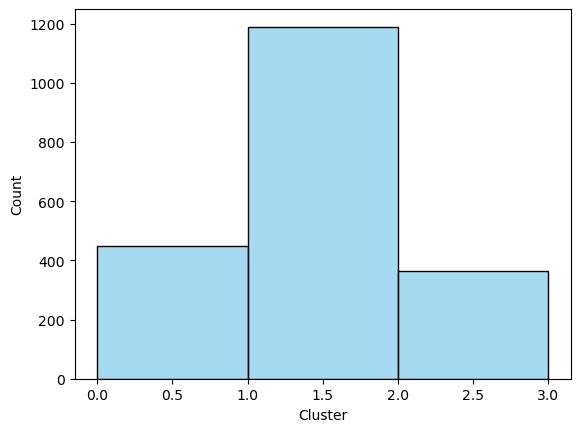

In [29]:
sns.histplot(data=df_normalized, x='Cluster', bins=range(4), kde=False, color='skyblue', edgecolor='black')
plt.show()

- самым объёмным получился кластер номер 2. Кластеры 1 и 3 примерно одинаковы по количеству

****

**Q4**    
- 0 - "Безусловно, согласия, сплоченности"
- 1 - "Скорее согласия, сплоченности"
- 2 - "Безусловно, несогласия, разобщенности"
- 3 - "Скорее несогласия, разобщенности"
- 4 - "Затрудняюсь ответить"

**Q5**
- 0 - "Скорее к первым (к готовым объединяться)"
- 1 - "Безусловно, к первым (к готовым объединяться)"
- 2 - "Скорее ко вторым (к неготовым объединяться)"
- 3 - "Безусловно, ко вторым (к неготовым объединяться)"
- 4 - "Затрудняюсь ответить"

****

### Рассмотрим кластеры более детально

### Cluster 1

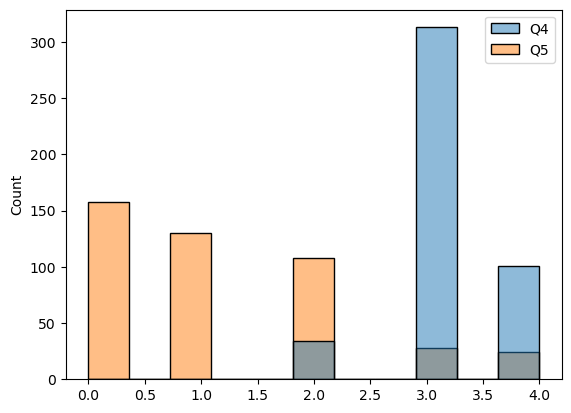

In [30]:
df = df_normalized.query('Cluster == 0')
ax = sns.histplot(data = df[['Q4', 'Q5']])

In [31]:
print(f"Количество людей в кластере 0: {df.shape[0]}")

Количество людей в кластере 0: 448


- В первом кластере наибольшее количество людей под критерием Q4 с метками 3 и 4 т.е. в их окружении** скорее больше** несогласия, разобщенности либо они затруднились в ответе 
- наибольшее количество людей под критерием Q5 с метками 0 и 1 т.е. они скорее и много кто **безусловно** готов объдиняться.

Значит, _у 448 людей_, которые **скорее и безусловно _готовы объединяться_ с другими** для совместных действий в окружении **_скорее больше несогласия, разобщенности_**

### Cluster 2

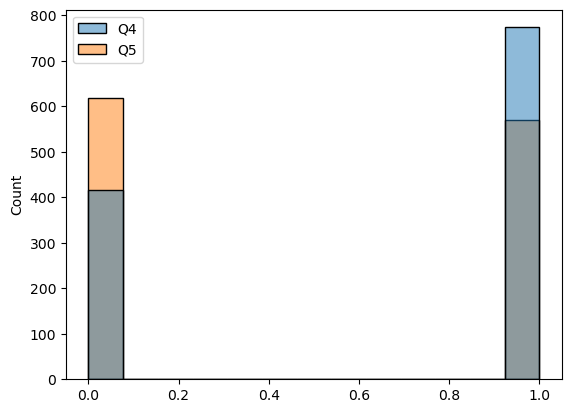

In [32]:
df = df_normalized.query('Cluster == 1')
ax = sns.histplot(data = df[['Q4', 'Q5']])

In [33]:
print(f"Количество людей в кластере 1: {df.shape[0]}")

Количество людей в кластере 1: 1190


- Во втором кластере наибольшее количество людей под критерием Q4 с метками 0 и 1 т.е. в их окружении **скорее и безусловно** больше согласия, сплоченности
- наибольшее количество людей под критерием Q5 с метками 0 и 1 т.е. они скорее и много кто **безусловно** готов объдиняться.

Значит, _у 1190 людей_ в окружении **больше согласия** и они также сами **готовы объединяться с другими** для совместных действий

### Cluster 3

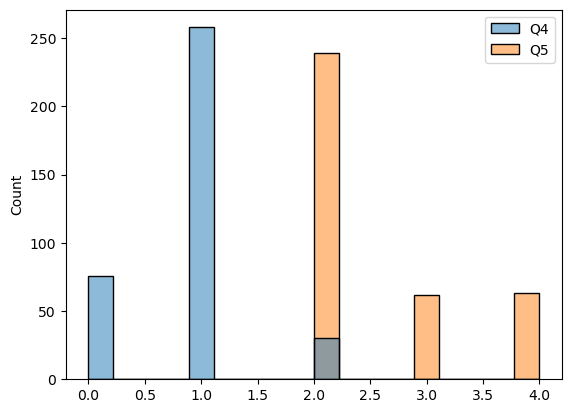

In [34]:
df = df_normalized.query('Cluster == 2')
ax = sns.histplot(data = df[['Q4', 'Q5']])

In [35]:
print(f"Количество людей в кластере 2: {df.shape[0]}")

Количество людей в кластере 2: 364


- Во втором кластере наибольшее количество людей под критерием Q4 с меткой 1 т.е. в их окружении скорее больше согласия, сплоченности
- наибольшее количество людей под критерием Q5 с меткой 2 т.е. они скорее не готовы объдиняться.

Значит, _у 364 людей_ в окржуние присутствует **скорее согласие и сплочённость**, но они всё равно скорее **не готовы** объединяться с другими для совместных действий

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> 2️⃣Вывод по кластеризации Q4 и Q5: <a class="tocSkip"> </h2> 
    
    Удалось разбить данные на 3 кластера:
- **Кластер №1: 448 человека**
  - _у 448 людей_, которые **скорее и безусловно _готовы объединяться_ с другими** для совместных действий в окружении **_скорее больше несогласия, разобщенности_**
-  **Кластер №2: 1190 человек**
    -  у 1190 людей в окружении **больше согласия** и они также сами **готовы объединяться** с другими для совместных действий
- **Кластер №3: 364 человека**
    - у 364 людей в окржуние присутствует **скорее согласие и сплочённость**, но они всё равно **скорее не готовы объединяться** с другими для совместных действий      
       
<h2> ‼️Заключение <a class="tocSkip"> </h2> 

  **Значит, большинство - более 50% живут в сплочённом обществе и готовы объединяться с другими, около 25% - инициативные люди, которые не живут в сплочённом обществе, но готовы объединяться с другими людьми для дальнейшего сотрудничества, чтобы это изменить. Остальные 25% скорее всего интроверты и стеснительные люди, которые живут в сплочённом обществе, но инициатив у них нет и возможно сотрудничать с новыми людьми они даже боятся**

****

<div class="alert alert-warning">
    <h2> 3️⃣Проверка самых часто встречаемых ответов в больших тестовых вопросах Q7 и Q8<a class="tocSkip"> </h2>
    
</div>

### Рассмотрим вопрос Q7: "О каких общественных, некоммерческих организациях и инициативах В ВАШЕМ ГОРОДЕ (СЕЛЕ, ПОСЁЛКЕ) Вы знаете или хотя бы слышали?"

In [36]:
# посмотрим на данные
df_q7 = data.iloc[1:, 14:41]
df_q7.head(5)

,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q7_8,Q7_9,Q7_10,...,Q7_18,Q7_19,Q7_20,Q7_21,Q7_22,Q7_23,Q7_24,Q7_25,Q7_26,Q7_97
ID,,,,,,,,,,,,,,,,,,,,,
063a20a33e679b4,НЕ ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН
06539b004760a54,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН
06e85272a3a11d4,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН
06470c0967c0d24,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН
06c807717b98184,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН


In [37]:
# проверим на пропуски
df_q7.isna().sum(),

(Q7_1     0
 Q7_2     0
 Q7_3     0
 Q7_4     0
 Q7_5     0
 Q7_6     0
 Q7_7     0
 Q7_8     0
 Q7_9     0
 Q7_10    0
 Q7_11    0
 Q7_12    0
 Q7_13    0
 Q7_14    0
 Q7_15    0
 Q7_16    0
 Q7_17    0
 Q7_18    0
 Q7_19    0
 Q7_20    0
 Q7_21    0
 Q7_22    0
 Q7_23    0
 Q7_24    0
 Q7_25    0
 Q7_26    0
 Q7_97    0
 dtype: int64,)

- данные полноценны, пропусков нет

In [38]:
cols_q7 = df_q7.columns
counts_q7 = list()

for column in df_q7.columns:
    dff = df_q7.loc[df_q7[column] == 'ВЫБРАН', column]
    counts_q7.append(len(dff))

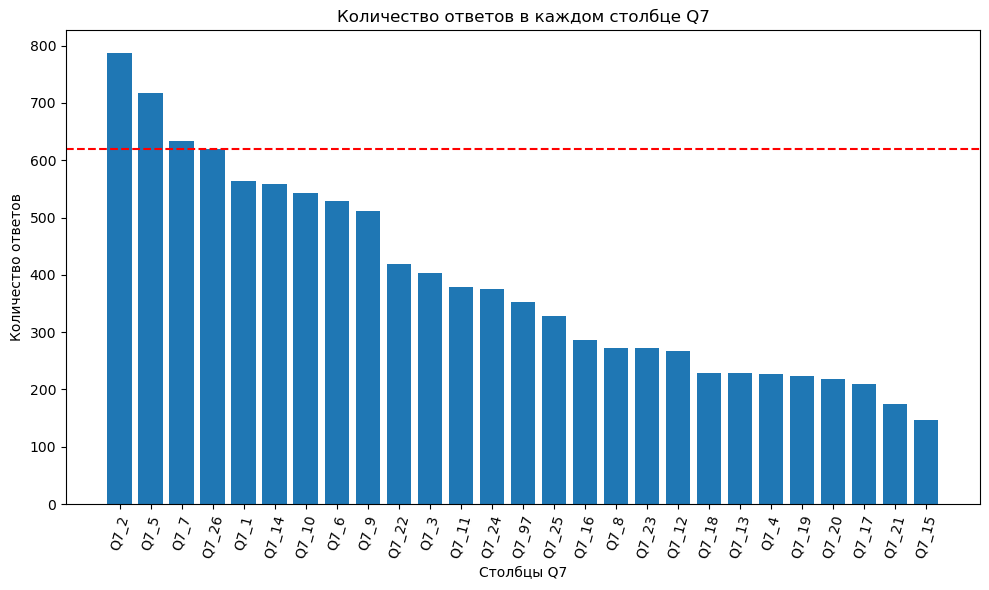

In [39]:
# Создание DataFrame с отсортированными значениями и именами столбцов
sorted_counts_q7 = pd.DataFrame({'Column': cols_q7, 'Count': counts_q7}).sort_values(by='Count', ascending = False)

# Установка столбца 'Column' в качестве индекса
sorted_counts_q7 = sorted_counts_q7.set_index('Column')

# Создание графика
plt.figure(figsize=(10, 6))

# Построение столбчатой диаграммы
plt.bar(sorted_counts_q7.index, height=sorted_counts_q7['Count'])

# Подписи оси x с поворотом на 75 градусов
plt.xticks(rotation=75)

# Добавление горизонтальной линии для сравнения
plt.axhline(y=620, color='red', linestyle='--', label='Сравнение')

# Добавление заголовка и подписей осей
plt.title('Количество ответов в каждом столбце Q7')
plt.xlabel('Столбцы Q7')
plt.ylabel('Количество ответов')

# Отображение графика
plt.tight_layout()
plt.show()

In [40]:
sorted_counts_q7.head(3)

,Count
Column,
Q7_2,787
Q7_5,717
Q7_7,634


**Топ-3 самыx часто встречаемых ответов в Q7 это:**
- Q7_2 (787 ответов): "Садовые и дачные товарищества"
- Q7_5 (717 ответов): "Профсоюзы"
- Q7_7 (634 ответов): "Общества инвалидов"

То есть, почти в 40% случаев люди знают о таких организациях как _Садовые и дачные товарищества_ и _Профсоюзы_. В 30% знают об _Обществе инвалидов_ и _Политических партиях_

### Также рассмотрим вопрос Q8: "Откуда Вам известны эти организации и инициативы?"

In [41]:
# посмотрим на данные
df_q8 = data.iloc[1:, 44:51]
df_q8.head(5)

,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7
ID,,,,,,,
063a20a33e679b4,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН
06539b004760a54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06e85272a3a11d4,ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН
06470c0967c0d24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06c807717b98184,НЕ ВЫБРАН,ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН


In [42]:
# проверим на ниличие пропущенных значений
df_q8.isna().sum()

Q8_1    353
Q8_2    353
Q8_3    353
Q8_4    353
Q8_5    353
Q8_6    353
Q8_7    353
dtype: int64

- пропущено около 17.5% значений, это подозрительно т.к. на прошлый вопрос ответили все участники. Попробуем узнать в чём причина.

In [43]:
columns_to_check = df_q8.columns

In [44]:
# выберем данные в Q8, где в строках пропущены значения в каждом из столбцов
rows_with_all_missing_values = df_q8[df_q8[columns_to_check].isnull().all(axis=1)]

In [45]:
# проверим данные предыдущего вопроса Q7 по индексам из Q8
df_q7_subset = df_q7.loc[rows_with_all_missing_values.index]

In [46]:
df_q7_subset.head(5)

,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q7_8,Q7_9,Q7_10,...,Q7_18,Q7_19,Q7_20,Q7_21,Q7_22,Q7_23,Q7_24,Q7_25,Q7_26,Q7_97
ID,,,,,,,,,,,,,,,,,,,,,
06539b004760a54,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН
06470c0967c0d24,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН
066bf76d3dc27e4,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН
0668f4925e24d94,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН
06195549e8aba24,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,...,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,НЕ ВЫБРАН,ВЫБРАН


In [47]:
selected_count = df_q7_subset[df_q7_subset['Q7_97'] == "ВЫБРАН"].shape[0]
selected_count

353

- количество пропущенных строк в Q8 совпадает с количеством строк в Q7, где выбрали ответ "Ни о каких организациях не знаю и не слышал(-а)"     
_Это объясняет найденную аномалию, тогда всё в порядке_

In [48]:
# избавимся от пропущенных значений
df_q8 = df_q8.dropna()

In [49]:
cols_q8 = df_q8.columns
counts_q8 = list()

# функция для подсчёта ответов в каждом из пунктов
for column in df_q8.columns:
    dff = df_q8.loc[df_q8[column] == 'ВЫБРАН', column]
    counts_q8.append(len(dff))

In [50]:
# Создание DataFrame с отсортированными значениями и именами столбцов
sorted_counts_q8 = pd.DataFrame({'Column': cols_q8, 'Count': counts_q8}).sort_values(by='Count', ascending = False)

# Установка столбца 'Column' в качестве индекса
sorted_counts_q8 = sorted_counts_q8.set_index('Column')

In [51]:
sorted_counts_q8.head(3)

,Count
Column,
Q8_4,952
Q8_7,511
Q8_6,387


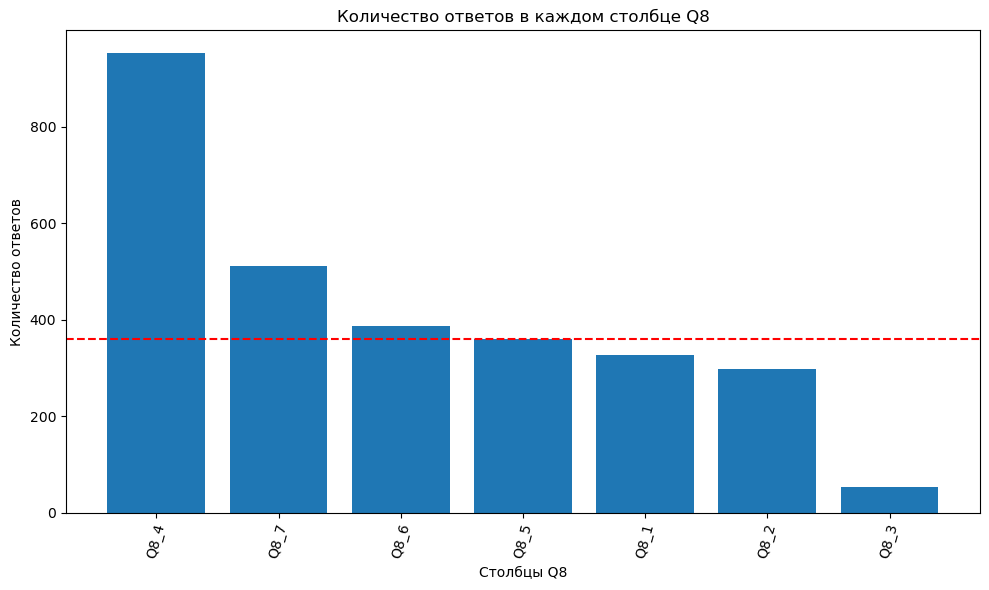

In [52]:
# Создание графика
plt.figure(figsize=(10, 6))

# Построение столбчатой диаграммы
plt.bar(sorted_counts_q8.index, height=sorted_counts_q8['Count'])

# Подписи оси x с поворотом на 75 градусов
plt.xticks(rotation=75)

# Добавление горизонтальной линии для сравнения
plt.axhline(y=361, color='red', linestyle='--', label='Сравнение')

# Добавление заголовка и подписей осей
plt.title('Количество ответов в каждом столбце Q8')
plt.xlabel('Столбцы Q8')
plt.ylabel('Количество ответов')

# Отображение графика
plt.tight_layout()
plt.show()

In [53]:
# Создаем пустой список для хранения индексов строк с несколькими вхождениями "ВЫБРАН"
rows_with_multiple_choices = []

# Проходим по каждой строке
for index, row in df_q8.iterrows():
    # Считаем количество вхождений "ВЫБРАН" в строке
    count_chosen = row.eq("ВЫБРАН").sum()
    # Если количество больше одного, добавляем индекс строки в список
    if count_chosen > 1:
        rows_with_multiple_choices.append(index)

# Выводим список индексов строк с несколькими вхождениями "ВЫБРАН"
print(f"Количество людей, которые выбрали несколько ответов: {len(rows_with_multiple_choices)}")


Количество людей, которые выбрали несколько ответов: 678


- в целом это никак не влияет на наше исследование т.к. нам важно распределение признаков, по которым люди узнают об организациях 

**Топ-3 самыx часто встречаемых ответов в Q8 это:**
- Q8_4 (952 ответов): "Слышал(-а) от других людей"
- Q8_7 (511 ответов): "Из материалов в Интернете, соцсетей"
- Q8_6 (387 ответов): "Из наружной рекламы / баннеров на улице"

То есть, почти в 50% случаев люди узнают о таких организациях от других людей. В 25% из материалов в Интернете, соцсетей и в остальном большинстве из Из наружной рекламы / баннеров на улице/ газет/ радио

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> 3️⃣Вывод по большим тестовым вопросам <a class="tocSkip"> </h2> 
    
    
- Почти в 40% случаев люди знают о таких организациях как Садовые и дачные товарищества и Профсоюзы. В 30% знают об Обществе инвалидов и Политических партиях
- почти в 50% случаев люди узнают о таких организациях от других людей. В 25% из материалов в Интернете, соцсетей и в остальном большинстве из Из наружной рекламы / баннеров на улице/ газет/ радио

<div class="alert alert-warning">
    <h2> 4️⃣Машинное обучение для предсказаний пропущенных ответов в вопросе "D9"<a class="tocSkip"> </h2>
    
</div>

### Обнаружили в вопросе "Какое место занимает религия в Вашей жизни?" 560 пропущенных ответов    

Люди, ответившие на вопрос "Считаете ли Вы себя верующим человеком?" - "Верующим человеком себя не считаю", пропустили интересующий нас вопрос "Какое место занимает религия в Вашей жизни?"            
**С помощью моделей машинного обучения попробуем предсказать, что они, при возможности, могли бы ответить**

#### Предскажем возможные ответы при помощи машинного обучения

In [54]:
data['D9'].isnull().sum()

560

- 560 человек не ответили на этот вопрос

In [55]:
# проверим сколько человек испытало трудность в ответе на этот вопрос
data.query('D9 == "Затрудняюсь ответить"')['D9'].count()

86

- это всего около 4% от кол-ва всех опрошенных

In [56]:
data.shape

(2003, 500)

In [57]:
# будем использовать данные из вопросов категории D
df = data.iloc[1:, 484:500]
df.head(5)

,D1,D2,D3,D4,D5,D5_DR,D6,D6_DR,D7,D7_DR,D8,D8_DR,D9,D10,D10_DR,D11
ID,,,,,,,,,,,,,,,,
063a20a33e679b4,"На одежду, обувь денег хватает, но крупную быт...",Менее половины,Нахожусь на пенсии и не работаю,NaN,NaN,NaN,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Верующим человеком себя не считаю,NaN,NaN,NaN,NaN,Среднее
06539b004760a54,"На одежду, обувь денег хватает, но крупную быт...",/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить/отказ о...,Нахожусь на пенсии и не работаю,NaN,NaN,NaN,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Верующим человеком себя не считаю,NaN,NaN,NaN,NaN,Плохое
06e85272a3a11d4,На квартиру или дом денег хватает,Примерно две трети,Работаю,Самозанятый(-ая),NaN,NaN,"Сфера услуг, сервиса, бытового обслуживания",NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Мусульманин,NaN,Очень важное,"Стараюсь выполнять религиозные предписания, ре...",NaN,Среднее
06470c0967c0d24,Денег не хватает даже на питание,Почти все,Работаю,Работаю по найму,Рабочий,NaN,Промышленное производство (в т.ч. добывающие о...,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Православный,NaN,Затрудняюсь ответить,/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить,NaN,Хорошее
06c807717b98184,"На бытовую технику денег хватает, но автомобил...",Менее половины,Учусь,NaN,NaN,NaN,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Затрудняюсь ответить/отказ от ответа,NaN,Совершенно не важное,/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить,NaN,Хорошее


In [58]:
# заменим значения '/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить', '/НЕ НА КАРТОЧКЕ/ Затрудняюсь ответить' на -->
# 'Затрудняюсь ответить'
df = df.replace(['/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить', '/НЕ НА КАРТОЧКЕ/ Затрудняюсь ответить'],\
                                    'Затрудняюсь ответить')

In [59]:
imp = SimpleImputer(strategy='constant', fill_value='unknown')
cl = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D10', 'D11']
df[cl] = imp.fit_transform(df[cl])
df[cl] = pd.DataFrame(df[cl], columns = cl)

### Подготовка данных

- **целевой признак –– "D9"**
- удалим признаки 'D5_DR', 'D6_DR', 'D8_DR', 'D10_DR' т.к. это дополнительные ответы и они могут усложнить процесс, но их удаление не повлияет на предсказания т.к. дополнительных ответов крайне мало

In [60]:
# выделим тестовую выборку, где целевой признак будет состоять из пропущенных значений
X_test_final =  df[df['D9'].isnull()].drop(['D9', 'D5_DR', 'D6_DR', 'D7_DR', 'D8_DR', 'D10_DR'], axis=1)

In [61]:
# Создание DataFrame X без строк, где 'D9' не равен np.nan
X = df[df['D9'].notnull()].drop(['D9', 'D5_DR', 'D6_DR', 'D7_DR', 'D8_DR', 'D10_DR'], axis=1)

# Создание Series y со строками, где 'D9' равен np.nan
y = df[df['D9'].notnull()]['D9']

In [62]:
# тестовую выборку возьмём в 20%
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE,
    test_size = 0.2)

In [63]:
ohe_columns = ['D6', 'D7', 'D8']
ord_columns = ['D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11']

In [64]:
# добавим кодируемые
ord_lst = list()

for i in ord_columns:
    a = list(X[i].unique())
    ord_lst.append(a)

In [65]:
# кодируем часть данных через OneHotEncoder
ohe_pipe = Pipeline(
    [
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [66]:
# кодируем часть данных через OrdinalEncoder
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
        ),
        (
            'ord',  
            OrdinalEncoder(
                handle_unknown='use_encoded_value', unknown_value=np.nan)
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
        )
    ]
)

In [67]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns)
    ], 
    remainder='passthrough'
)

In [68]:
# итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [69]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [70]:
pipe_final.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['D6', 'D7', 'D8']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(fill_value=-1,
                                                                                 strategy='constant')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(fill_value=-1,
                                                                                 strategy='constant'))]),
                                                  ['D1', 'D2', 'D3', 'D4', 'D5',
                                                   'D10', 'D11'])])),
                ('models', DecisionTreeClassifier(random_state=42))])

### Предскажем пропущенные значения, предварительно закодировав тренировачные данные в числа

In [71]:
param_grid = [
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'models__weights': ['uniform', 'distance'],
        'models__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 4]
    },
    # словарь для модели SVC()
    {
        'models': [SVC(kernel='linear', random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10, 100],
        'models__gamma': ['scale', 'auto']
    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10, 100],
        'models__solver': ['liblinear', 'saga'],
        'models__penalty': ['l1', 'l2']
    }
]

In [1]:
# grid_search = GridSearchCV(
#     pipe_final, 
#     param_grid, 
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1
# )

#grid_search.fit(X_train, y_train)

In [73]:
model = grid_search.best_estimator_
best_score = grid_search.best_score_

In [74]:
print('Лучшая модель и её параметры:\n\n', model)
print ('Метрика лучшей модели на тренировочной выборке:', best_score)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['D6', 'D7', 'D8']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(fill_value=-1,
                                                                                 strategy='constant')),
              

- метрика лучшей модели на кросс-валидации не самого лучшего качетсва - 0.5585. Стоит учитывать специфику данных, они текстовые, поэтому кодирование в числа, возможно не самый лучший вариант, но имеет место быть.

In [75]:
# создадим списки лучших моделей
# и их значений метрики accuracy на кросс-валидации
mdl = list()
acc_score = list()

In [76]:
acc_score.append(best_score)

In [77]:
# Получение имени лучшей модели 
best_model_name = type(model.named_steps['models']).__name__
mdl.append(best_model_name)

In [78]:
# предсказанные значения
preds = model.predict(X_test_final)

In [79]:
# Создаем объект Series из предсказанных значений
preds_series = pd.Series(preds)

# Подсчитываем количество уникальных значений
value_counts = preds_series.value_counts()
value_counts

Довольно важное         207
Не очень важное         179
Затрудняюсь ответить     77
Совершенно не важное     67
Очень важное             30
Name: count, dtype: int64

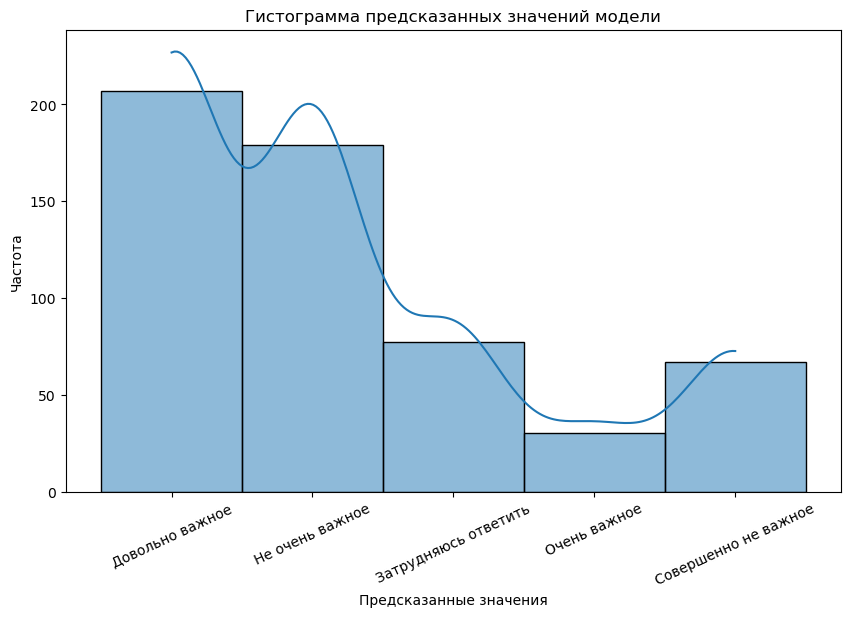

In [80]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(preds, bins=20, kde=True)
plt.xlabel('Предсказанные значения')
plt.ylabel('Частота')
plt.title('Гистограмма предсказанных значений модели')
plt.xticks(rotation = 25)
plt.show()

- Для 37% людей, не ответивших на этот вопрос религия имеет довольно важное значение. Для 31% не очень важное и для 12% имеет совершенно не важное значение либо они затруднились ответить.

****

### Используем новый метод кодирования текстовых данных в числовые признаки:        
**"Term Frequency-Inverse Document Frequency" (TF-IDF)**

**Выбирал между двумя инструментами преобразования текстовых данных в числовые признаки:**
- CountVectorizer: часто используется, когда важно просто учитывать частоту встречаемости слов.
- TfidfVectorizer: часто предпочтителен, когда нужно учитывать не только частоту, но и важность слова для конкретного документа в контексте всей коллекции.

**TfidfVectorizer** будет предпочтительнее в нашем случае, учитывая специфику данных

In [81]:
df['combined'] = df['D1'] + ' ' + df['D2'] + ' ' + df['D3'] + ' ' + df['D4'] + ' ' + df['D5'] \
                + ' ' + df['D6'] + ' ' + df['D7'] + ' ' + df['D8'] + ' ' + df['D10'] + ' ' + df['D11']

In [82]:
X_train = df[df['D9'].notnull()]['combined']
y_train = df[df['D9'].notnull()]['D9']
X_test = df[df['D9'].isnull()]['combined']

In [83]:
# Преобразование текстовых данных в признаки
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [84]:
# Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Инициализация и обучение модели случайного леса
rf_model = RandomForestClassifier(random_state=42)

# Определение параметров для поиска RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', 0.2, 0.5, 0.8, None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Создание объекта RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model,
                                   param_grid,
                                   n_iter=10,
                                   cv=3,
                                   n_jobs=-1,
                                   scoring='accuracy',
                                   random_state=42)

# Поиск лучших параметров на обучающих данных
random_search.fit(X_train_resampled, y_train_resampled)
#random_search.fit(X_train, y_train)


# Лучшие параметры и оценка модели
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Лучшие параметры:", best_params)
print("Лучшая оценка accuracy на кросс-валидации:", best_score)

# Использование лучших параметров для модели
best_rf_model_2 = random_search.best_estimator_

# Предсказание на тестовой выборке с лучшей моделью
predictions = best_rf_model_2.predict(X_test)

Лучшие параметры: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': None, 'bootstrap': False}
Лучшая оценка accuracy на кросс-валидации: 0.7709164978201001


- Здесь метрика accuracy уже более приемлема - 0.7709. Значит, этот способ кодирования данных гораздо эффективнее, также применили балансировку классов с помощью SMOTE

In [85]:
mdl.append("RandomForestClassifier")
acc_score.append(best_score)

In [86]:
preds = pd.Series(predictions)
preds.value_counts()

Не очень важное         262
Довольно важное         165
Совершенно не важное     93
Затрудняюсь ответить     35
Очень важное              5
Name: count, dtype: int64

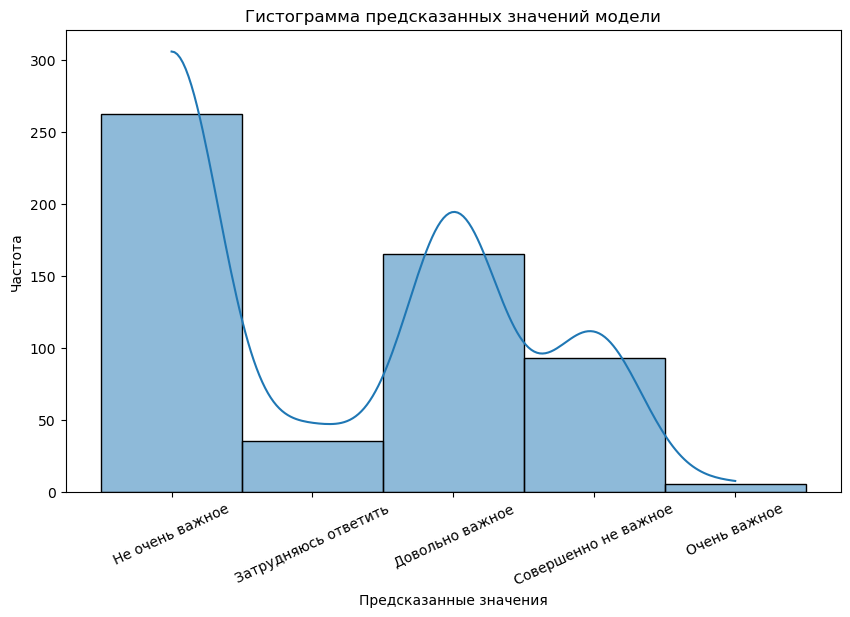

In [87]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(preds, bins=20, kde=True)
plt.xlabel('Предсказанные значения')
plt.ylabel('Частота')
plt.title('Гистограмма предсказанных значений модели')
plt.xticks(rotation = 25)
plt.show()

**Для 46% людей, не ответивших на этот вопрос религия имеет не очень важное значение. Для 30% не очень важное и для 12% имеет довольно важное значение и для 15% совершенно не важное**

****

### Применим градиентный бустинг для предсказания пропущенных ответов

In [88]:
# Инициализация и обучение модели CatBoost
catboost_model = CatBoostClassifier(
    iterations=500,  # Количество итераций
    learning_rate=0.1,  # Скорость обучения
    depth=6,  # Глубина деревьев
    random_seed=42,  # Задаем случайное значение для воспроизводимости результатов
    verbose=100  # Вывод прогресса каждые 100 итераций
)

score = cross_val_score(catboost_model, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy')
# Обучение модели на обучающих данных
catboost_model.fit(X_train_resampled, y_train_resampled)

# Предсказание на тестовой выборке
predictions = catboost_model.predict(X_test)

0:	learn: 1.5336855	total: 94ms	remaining: 46.9s
100:	learn: 0.6066578	total: 2.52s	remaining: 9.97s
200:	learn: 0.4335597	total: 4.76s	remaining: 7.08s
300:	learn: 0.3498529	total: 6.78s	remaining: 4.48s
400:	learn: 0.2936079	total: 8.81s	remaining: 2.17s
499:	learn: 0.2534791	total: 10.8s	remaining: 0us
0:	learn: 1.5439412	total: 21.5ms	remaining: 10.7s
100:	learn: 0.7020361	total: 1.49s	remaining: 5.9s
200:	learn: 0.5108787	total: 3.13s	remaining: 4.65s
300:	learn: 0.4124303	total: 4.72s	remaining: 3.12s
400:	learn: 0.3493205	total: 6.13s	remaining: 1.51s
499:	learn: 0.3003625	total: 7.63s	remaining: 0us
0:	learn: 1.5452426	total: 21.3ms	remaining: 10.6s
100:	learn: 0.7091433	total: 1.49s	remaining: 5.89s
200:	learn: 0.5446951	total: 2.9s	remaining: 4.31s
300:	learn: 0.4584677	total: 4.25s	remaining: 2.81s
400:	learn: 0.3930973	total: 5.58s	remaining: 1.38s
499:	learn: 0.3462970	total: 7.09s	remaining: 0us
0:	learn: 1.5353667	total: 28.6ms	remaining: 14.3s
100:	learn: 0.6746210	tota

In [89]:
score = max(score)
print(score)

0.8283132530120482


- Лучшая метрика accuracy на кросс-валидации: 0.8283

In [90]:
mdl.append("CatBoostClassifier")
acc_score.append(score)

In [91]:
# Преобразуем preds в одномерный массив
preds = predictions.flatten()

# Создаем объект Series
preds = pd.Series(preds, dtype='string')

In [92]:
preds.value_counts()

Довольно важное         222
Совершенно не важное    144
Не очень важное         107
Затрудняюсь ответить     60
Очень важное             27
Name: count, dtype: Int64

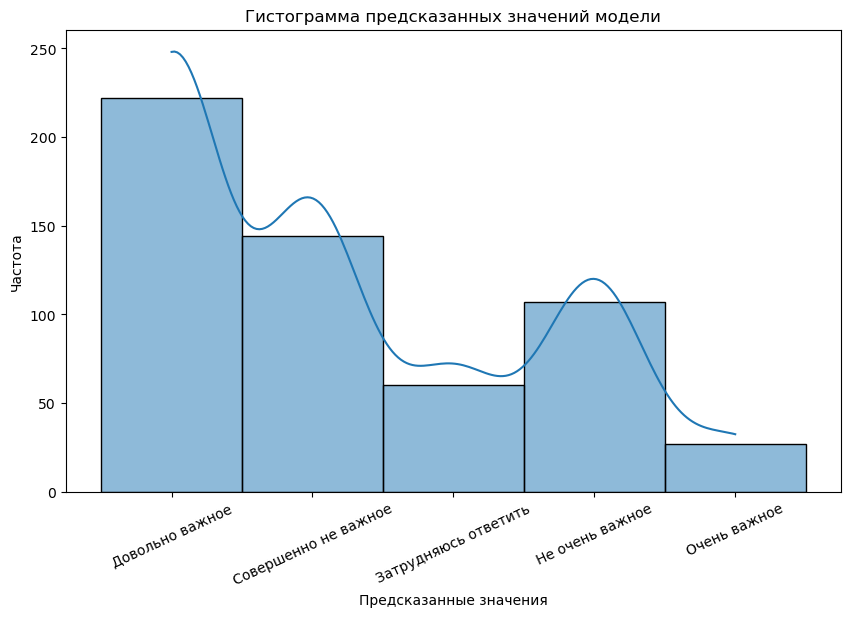

In [93]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(preds, bins=20, kde=True)
plt.xlabel('Предсказанные значения')
plt.ylabel('Частота')
plt.title('Гистограмма предсказанных значений модели')
plt.xticks(rotation = 25)
plt.show()

**Для 40% людей, не ответивших на этот вопрос религия имеет довольно важное значение. Для 25% совершенно не важное и для 19% имеет не очень важное значение и для 15% совершенно не важное**

### Создадим таблицу с моделями и значениями их метрик

In [94]:
table = pd.DataFrame({
    'model': mdl,
    'accuracy': acc_score
})

table

,model,accuracy
0,KNeighborsClassifier,0.558558
1,RandomForestClassifier,0.770916
2,CatBoostClassifier,0.828313


- лучшая модель - **CatBoostClassifier.** Она прилично лучше по качеству чем предыдущие модели, значит, будем руководствоваться её предсказаниями.

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> 4️⃣Вывод по предсказаниям пропущенных ответов в вопросе "D9" <a class="tocSkip"> </h2> 
    
    
- 1️⃣ Для предсказаний на закодированных данных через OneHotEncoder и OrdinalEncoder переберали несколько моделей и гиперпараметры для них через GridSearchCV. Лучшая модель - KNeighborsClassifier, accuracy - 0.558558.
- 2️⃣ Для предсказаний на закодированных данных через TfidfVectorizer использовали модель - RandomForestClassifier и подбирали гиперпараметры для неё через RandomizedSearchCV. Лучшее значение метрики accuracy на кросс-валидации - 0.770916.
- 3️⃣ Второй способ для предсказаний на закодированных данных через TfidfVectorizer была модель градиентного бустинга - CatBoostClassifier. Для неё поставили фиксированные гиперпараметры. Лучшее значение метрики accuracy на кросс-валидации - 0.828313      

<h2> ‼️Заключение <a class="tocSkip"> </h2> 
- лучшая модель - CatBoostClassifier. Она прилично лучше по качеству чем предыдущие модели, значит, будем руководствоваться её предсказаниями.
- Для 40% людей, не ответивших на этот вопрос религия имеет довольно важное значение. Для 25% совершенно не важное и для 19% имеет не очень важное значение и для 15% совершенно не важное

****

****

<div style="border:solid Chocolate 2px; padding: 40px">

---

<h1>☝ Общий вывод по проекту</h1> 

---

<h2 style="color:#ff6347;">1️⃣ Демографический анализ:</h2> 
    
**Проведенный анализ демографических данных позволил выявить следующие важные моменты:**

- Самые многочисленные группы опрошенных представлены из следующих городов: Москва, Санкт-Петербург, Республика Дагестан, Ставропольский край и Ростовская область. Это говорит о широком географическом охвате и разнообразии представленных регионов.
- Анализ возраста показал, что респонденты из Ставропольского края оказались самыми возрастными, с медианным возрастом женщин в 50 лет и мужчин в 47 лет. Это может указывать на более стабильные и зрелые возрастные группы в этом регионе.
- В опросе участвовало больше женщин, чем мужчин. Это может быть связано с их большей готовностью к участию в подобного рода исследованиях, а также более высокой социальной активностью.
- Отмечается, что 38.4% опрошенных имеют среднее специальное образование, что является наиболее распространенным уровнем образования среди респондентов. В то же время всего 2 человека из выборки окончили аспирантуру.

---

<h3 style="color:#008080;">🔍 Выводы</h3>
Демографический анализ позволил нам лучше понять характеристики опрошенной аудитории. Мы выяснили, что участники из различных регионов России приняли участие в исследовании, что свидетельствует о его широком охвате. Также выяснилось, что большинство опрошенных имеют среднее специальное образование, но аспирантуру закончили лишь единицы.    

Самые возрастные респонденты приходятся на Ставропольский край, что может указывать на специфику данного региона. Более того, большее число женщин в опросе может говорить о более высокой активности в подобных исследованиях.     

Эти результаты позволяют сделать вывод о том, что исследование позволило получить представление о разнообразии и географическом распределении опрошенных, их уровне образования и характеристиках по возрасту. Эта информация может быть полезной для дальнейшего анализа и разработки рекомендаций.    

---

<div style="border:solid Chocolate 2px; padding: 40px">

---

<h2 style="color:#ff6347;">2️⃣ Кластеризация респондентов</h2>
Проведенная кластеризация позволила разделить респондентов на три основных кластера с разными характеристиками и готовностью к совместным действиям:

<h4 style="color:#4682b4;">🕐 Кластер №1: Готовность к объединению</h4>
Этот кластер включает в себя 448 человек, которые скорее и безусловно готовы объединяться с другими для совместных действий. Однако, в их окружении преобладает большое количество несогласий и разобщенности. Это может указывать на то, что, хотя они готовы к сотрудничеству, внешние факторы создают определенные препятствия.

<h4 style="color:#4682b4;">🕑 Кластер №2: Преобладание согласия</h4>
В этот кластер входят 1190 человек, среди которых преобладает согласие в окружении. Они также готовы объединяться с другими для совместных действий. Этот кластер может представлять собой более гармоничное и сплоченное сообщество, готовое к сотрудничеству.

<h4 style="color:#4682b4;">🕒 Кластер №3: Согласие и сплоченность</h4>
Кластер №3 включает 364 человека, среди которых преобладает скорее согласие и сплоченность. Однако, они всё же скорее не готовы объединяться с другими для совместных действий. Этот кластер может быть интересным, поскольку люди в нем выглядят более сплоченными, но не проявляют высокой готовности к активному сотрудничеству.

<h3 style="color:#008080;">🔍 Выводы</h3>
На основе кластерного анализа можно сделать следующие выводы:

- Большинство респондентов, более 50%, живут в сплоченном обществе и готовы объединяться с другими для совместных действий. Это указывает на высокий уровень социальной активности и открытости к сотрудничеству.
- Около 25% опрошенных можно охарактеризовать как инициативныx людей, которые не живут в сплоченном обществе, но готовы объединяться с другими для дальнейшего сотрудничества.
- Оставшиеся 25% скорее всего являются интровертами и стеснительными личностями, которые живут в сплоченном обществе, но не проявляют высокой инициативы в сотрудничестве с другими.

Таким образом, кластерный анализ помог нам лучше понять социальную структуру и готовность к сотрудничеству опрошенной аудитории. Эти выводы могут быть полезны при разработке стратегий социального взаимодействия и инициатив, направленных на развитие сообщества и улучшение качества жизни его членов.

---

<div style="border:solid Chocolate 2px; padding: 40px">

---

<h2 style="color:#ff6347;">3️⃣ Информированность об организациях</h2>
Из анализа данных об информированности респондентов об организациях можно выделить следующие ключевые моменты:

<h4 style="color:#4682b4;">🧠 Информированность о различных организациях:</h4>

- Садовые и дачные товарищества и Профсоюзы: Почти в 40% случаев опрошенные знают о существовании таких организаций. Это может указывать на значительный уровень информированности организациях, способствующих обеспечению личных интересов и социальных прав.
- Общество инвалидов и Политические партии: Примерно 30% опрошенных знают об этих организациях. Эти данные могут свидетельствовать о некоторой осведомленности о социальных и политических структурах, влияющих на общественную жизнь.
- Источники информации: Почти в 50% случаев опрошенные узнают о различных организациях от других людей. Это говорит о значительной роли устного передачи информации и социальной сети в распространении знаний.
- Интернет и другие ресурсы: В 25% случаев опрошенные получают информацию об организациях из материалов в интернете, социальных сетях, а также из наружной рекламы, баннеров на улице, газет и радио. Это отражает важность современных информационных технологий и медиа-ресурсов в распространении информации.

<h3 style="color:#008080;">🔍 Выводы</h3>
Итак, анализ информированности об организациях позволяет сделать следующие выводы:    

- Высокий уровень осведомленности: Почти половина опрошенных имеют представление о различных организациях, что свидетельствует о широком круге интересов и вовлеченности в социальную жизнь.
- Роль межличностных связей: Около половины опрошенных получают информацию о организациях от других людей. Это подчеркивает важность коммуникации и обмена знаниями в формировании представлений о социальных структурах.
- Значение информационных технологий: Интернет и другие медиа-ресурсы играют существенную роль в распространении информации об организациях, что подчеркивает необходимость уделять внимание цифровым каналам коммуникации.

Таким образом, наличие информированности об организациях среди респондентов указывает на активный уровень гражданской активности и интереса к общественным и социальным вопросам. Эти данные могут быть важными при формировании стратегий информационной политики организаций и государственных институтов, а также при разработке программ образования и социальной поддержки.

---

<div style="border:solid Chocolate 2px; padding: 40px">

---

<h2 style="color:#ff6347;">4️⃣ Анализ предсказания пропущенных ответов о роли религии в жизни</h2>
После проведения машинного обучения для предсказания пропущенных ответов на вопрос о роли религии в жизни респондентов были получены следующие результаты:

<h4 style="color:#4682b4;">🔮 Предсказания с использованием машинного обучения:</h4>

- Модель KNeighborsClassifier: При использовании OneHotEncoder и OrdinalEncoder для предсказаний на закодированных данных получили accuracy 0.558558 после подбора гиперпараметров через GridSearchCV.
- Модель RandomForestClassifier: Используя TfidfVectorizer для предсказаний на закодированных данных, получили лучшее значение метрики accuracy на кросс-валидации - 0.770916 после подбора гиперпараметров через RandomizedSearchCV.
- Модель CatBoostClassifier: Для предсказаний на закодированных данных через TfidfVectorizer была использована модель градиентного бустинга. Лучшее значение метрики accuracy на кросс-валидации составило 0.828313.

<h3 style="color:#008080;">🔍 Выводы:</h3>
После проведения анализа результатов машинного обучения для предсказания пропущенных ответов о роли религии в жизни респондентов можно сделать следующие выводы:      

- Лучшая модель - CatBoostClassifier: С уверенностью можно сказать, что модель CatBoostClassifier, демонстрирующая метрику accuracy на уровне 0.828313, является наиболее точной и эффективной для предсказания роли религии в жизни опрошенных. Благодаря её использованию мы можем получить наиболее достоверные результаты.      
- Значимость религии в жизни респондентов: Для 40% людей, которые не ответили на данный вопрос, религия имеет довольно важное значение. Однако, для 25% опрошенных она совершенно не важна, для 19% имеет не очень важное значение, а для 15% вообще совершенно не играет роли.
     
Таким образом, результаты машинного обучения позволяют нам лучше понять важность религиозных убеждений в жизни нашей аудитории и принимать более обоснованные решения при анализе данных и разработке стратегий.

---

<div style="background-color:#f7f7f7; padding:20px; border: 2px solid #008080; border-radius: 5px;">
    <center>
        <h1 style="color:#008080;">🦄 Итоговое заключение</h1>
    </center>
    <hr style="border-top: 2px solid #008080;">
    <p style="font-size:16px;">Проведенное исследование обладает значительной ценностью, предоставляя множество данных о респондентах. Демографический анализ позволил получить обширное представление о географическом и образовательном разнообразии участников исследования, подчеркивая его широкий охват. Кластерный анализ выявил различные социальные типы личностей, что дает базу для индивидуального подхода в планировании взаимодействия с ними. Информированность об организациях выявила значимость межличностных связей и цифровых платформ в распространении информации. Кроме того, модель машинного обучения эффективно предсказала роль религии в жизни опрошенных. Общий вывод подчеркивает важность проведенного исследования для разработки целенаправленных программ социального взаимодействия и образовательных инициатив, которые учитывают разнообразие и специфику потребностей аудитории. Полученные результаты могут служить основой для развития эффективных стратегий, направленных на улучшение качества жизни и социальной активности общества.</p>
</div>
